<a href="https://colab.research.google.com/github/apmotgi16/NYGroceryPlacement/blob/master/NYGroceryPlacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 192 Final Project
## *Abhi Motgi & Ciara Brown*
Computing the ideal locations of 190 grocery stores in New York City based on population demand

## 1. Loading & Preparing Datasets
The main datasets we used are:

*   NYC Retail Food Stores.csv - contains 22,000+ rows of food stores in New York State
*  NYC Retail Food Stores COORDINATES.csv - contains geocoded latitude and longitudes of NYC stores
*  New_York_City_Population_By_Census_Tracts.csv - contains 2010 census data with population and tracts
*  2017_ny_tracts.csv - contains FIPS codes / counties and tracts for computing lat & long of population points




### 1a. Importing Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stores = pd.read_csv('NYC Retail Food Stores COORDINATES.csv')
store_list = stores[['LAT', 'LONG']].values.T.tolist()

population = pd.read_csv('New_York_City_Population_By_Census_Tracts.csv', skiprows=0)
ny_coords = pd.read_csv('2017_ny_tracts.csv', skiprows=0)

#merge datasets on GEOID (fips code)
big_pop = pd.merge(population, ny_coords, on='GEOID', how='inner')

#select pop & coordinates into list
pop_list = big_pop[['Population', 'INTPTLAT', 'INTPTLONG']].values.T.tolist()

### 1b. Preparing Data

Population of NYC is ~8 million. scikit-learn doesn't support weighted k-means cluster so instead of weighing each GPS coordinate with n (n = population in county), we have to create a list where each GPS coordinate occurs in the list n times 


In [0]:
import random

big_coords_list = []

for i in range(len(pop_list[0])):
  while (pop_list[0][i] > 0):
    big_coords_list.append([pop_list[1][i], pop_list[2][i]])
    pop_list[0][i] -= 1


## 2. Computing Ideal Store Locations using K-Means Clustering

There are over 14,000 grocery stores in New York City but because many of them are within 100 feet, they have the same gps coordinates. As a result, our dataset contains 190 unique latitudes and longitudes. We thus ran the k-means clustering on the population data with k=190 to compute where the ideal grocery stores should be located. We randomly sample 1 million points of population data (out of 8 million) to limit the computation we have to do.

*Takes ~6 minutes to run*

In [0]:
import matplotlib.pyplot as plt  
import random
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans  

#random sample coordinates
coords_list = random.sample(big_coords_list, 1000000)

# put long, lat coordinate pairs here
X = np.array(coords_list)

kmeans = KMeans(n_clusters=190, max_iter = 10)  
kmeans.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
    n_clusters=190, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## 3. Analyzing Our Results

Custom class for plotting line-scatter graphs to see how final analysis did

In [0]:
import matplotlib.pyplot as plt

class MakeGraph(object):
  def __init__(self, xList, yList):
    df = pd.DataFrame({'xVals': xList, 'yVals': yList})
    plt.plot('xVals', 'yVals', data=df, linestyle='-', marker='o', color='black')
    plt.xlabel('Cumulative Population Size')
    plt.ylabel('Average Minimum Distance in Miles')
    

### 3a. Plotting population data, k-means clusters, and actual stores


*   Colorful dots = population data (1 million points but many effectively on top of each other)
*   Translucent black circles = clusters (190 points)
*   Yellow squares = actual store locations (190 points)

*Takes ~1 minute to run*


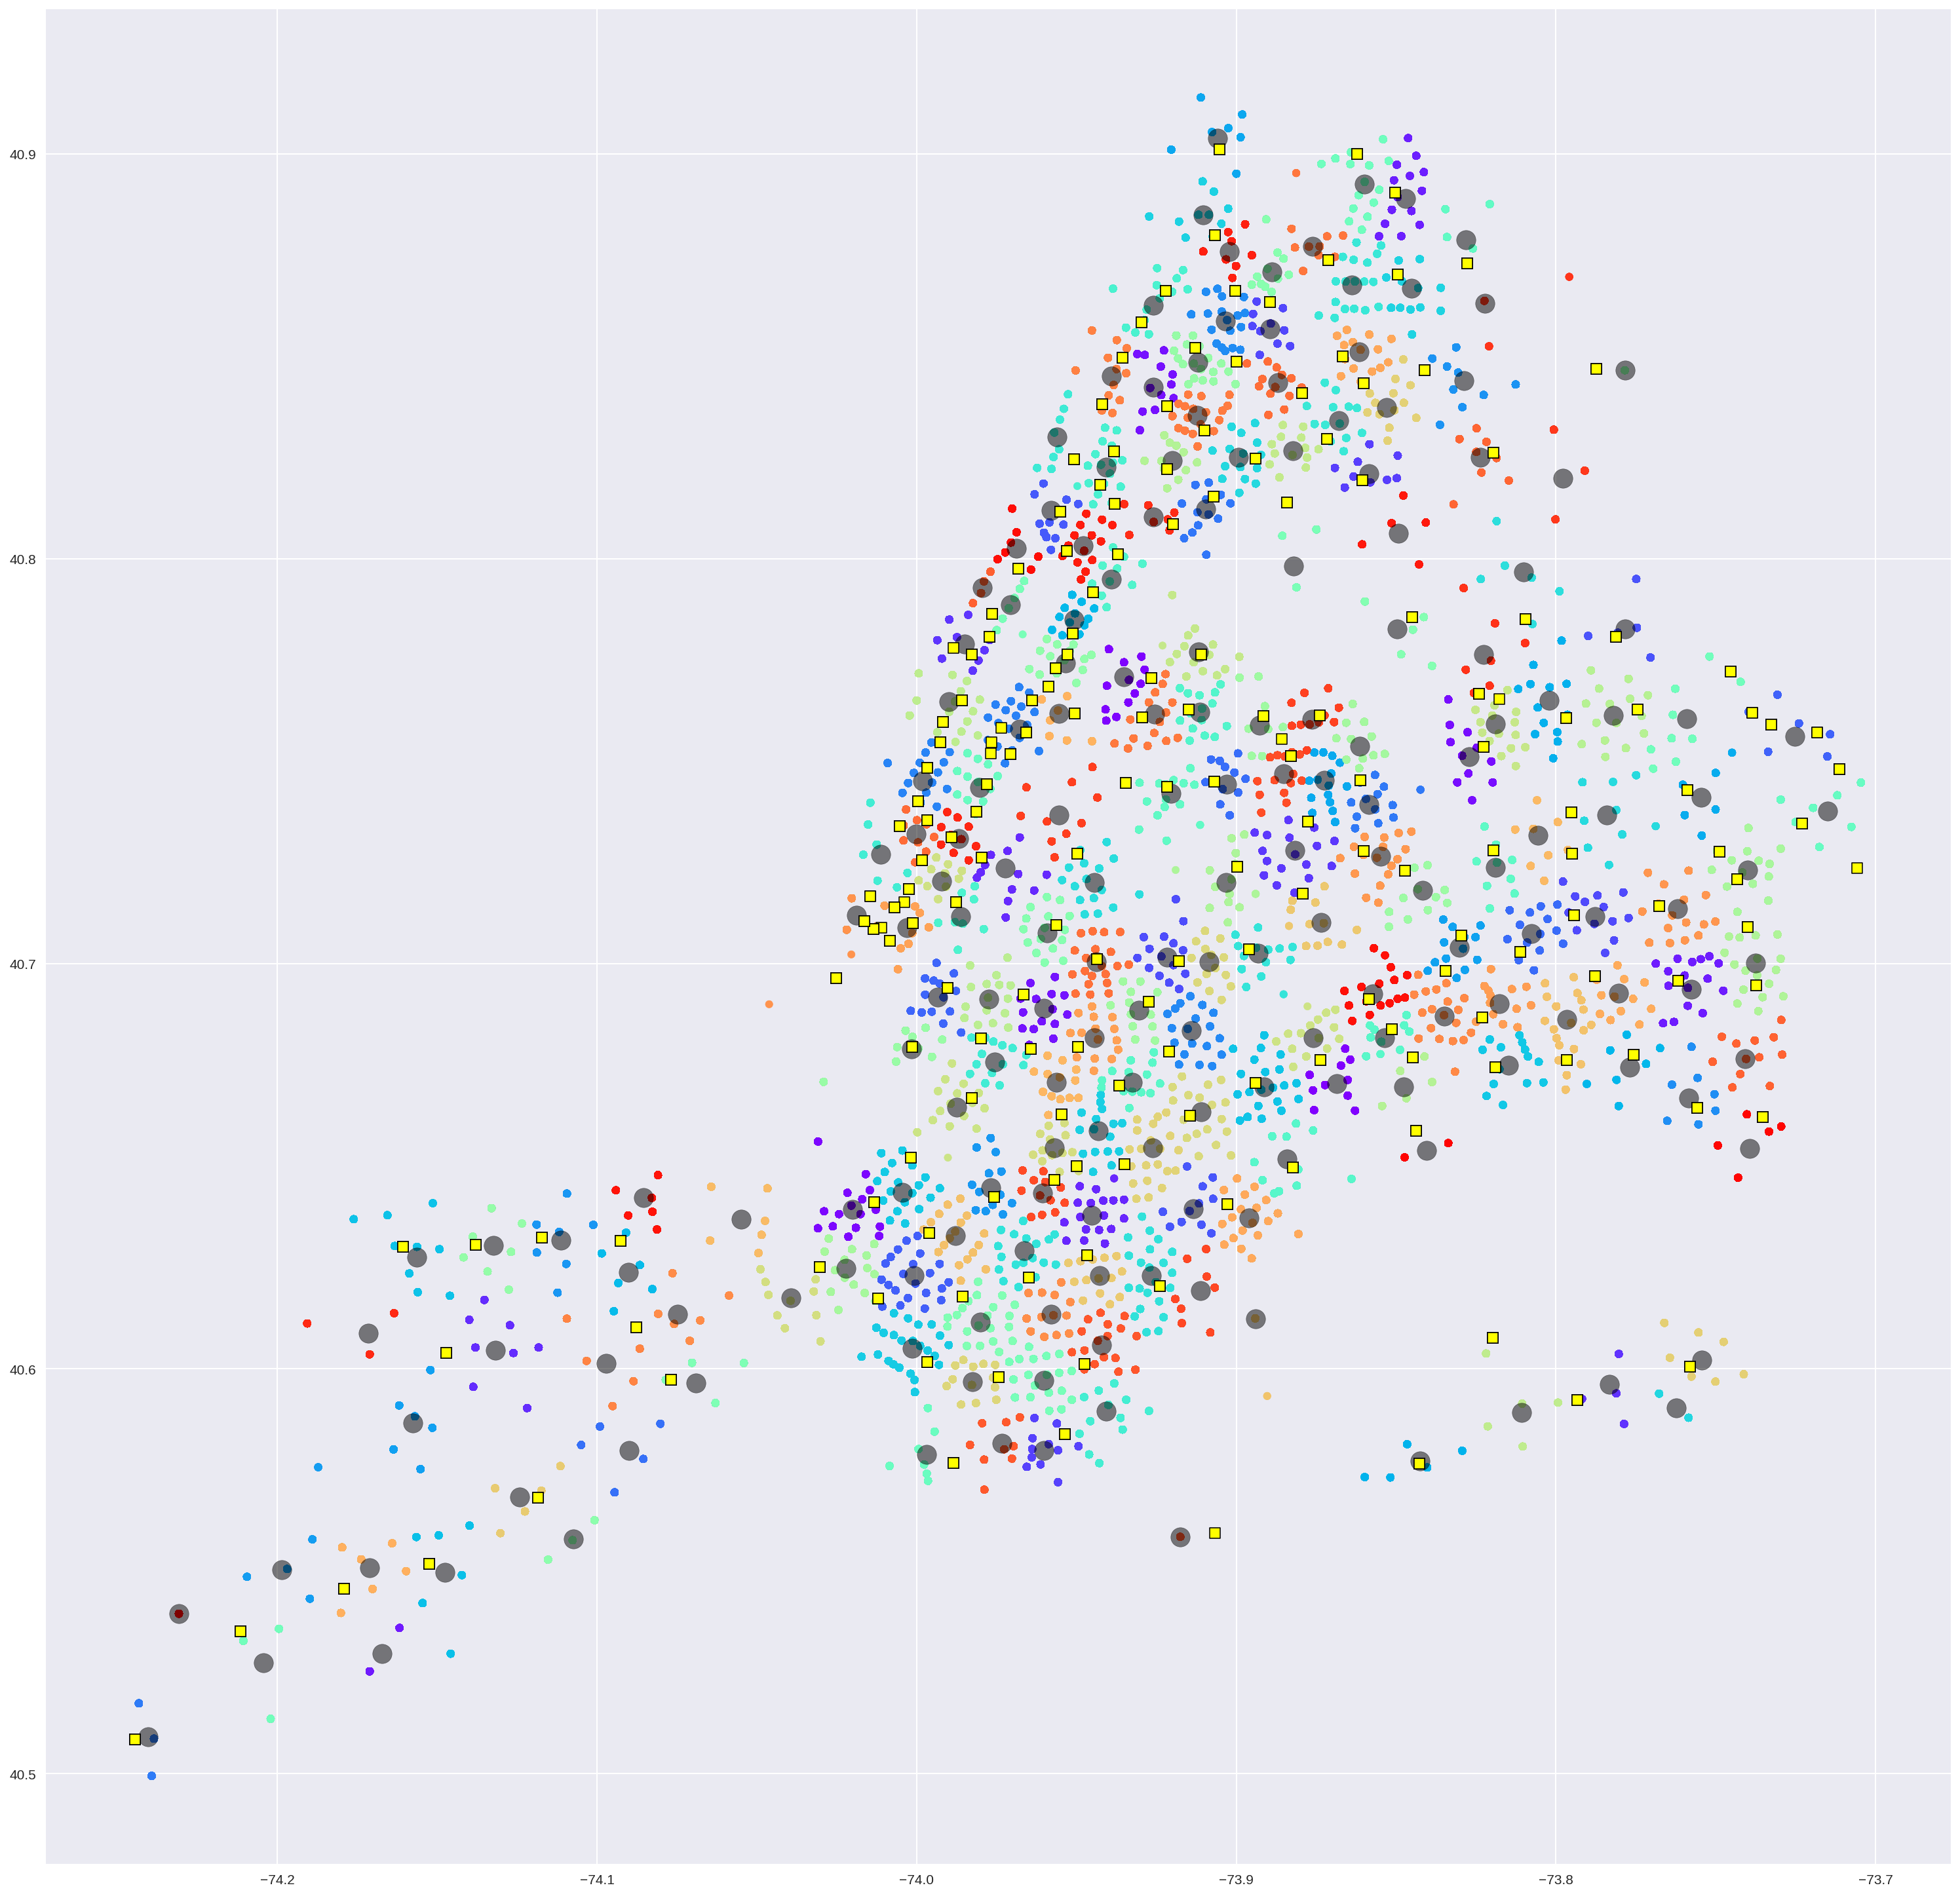

In [0]:
import matplotlib.pyplot as plt  
import collections
import random

plt.figure(figsize=(25, 25), dpi=150)

#plot population
plt.scatter(X[:,1],X[:,0], c=kmeans.labels_, cmap='rainbow', s=30)

# plot the calculated cluster centers
plt.scatter(kmeans.cluster_centers_[:,1] ,kmeans.cluster_centers_[:,0], color='black', s = 200, alpha = 0.5)  

#plot existing retail stores
plt.scatter(store_list[1], store_list[0], s=60, color='yellow', edgecolors='black', linewidths=0.75, marker='s')

### 3b. Computing Average Minimum Distance between People and 190 Computed Clusters

We sample 5000 random people from our list of 8 million, find the closest store to them, and then save that result. We then compute the average distance of the closest store for our 5000 people and plot that using `MakeGraph()`

*Takes about ~4 minutes*

[[40.8082917, -73.9387853], [40.8318544, -73.80067820000001], [40.733477, -73.8628305], [40.6637329, -73.86285670000001], [40.7475672, -73.987298], [40.6859083, -73.8637277], [40.8616561, -73.8660255], [40.7469665, -73.87029809999999], [40.6180182, -74.14603509999999], [40.7035729, -73.94409990000001], [40.7007289, -73.9541699], [40.7810927, -73.9544321], [40.7568672, -73.7724538], [40.7638178, -73.81920840000001], [40.7759141, -73.95821], [40.7337076, -73.9923293], [40.696496999999994, -73.8310666], [40.7813494, -73.9491245], [40.666003700000005, -73.88715359999999], [40.6878546, -73.9493878], [40.588248, -74.156982], [40.760166999999996, -73.9108443], [40.539522399999996, -74.2308266], [40.5798725, -73.9557672], [40.6296068, -73.8984805], [40.755788, -73.9677745], [40.7446146, -73.8829538], [40.6971881, -73.8465756], [40.5828706, -73.9637677], [40.7748158, -73.8203709], [40.684566, -73.93237590000001], [40.8481818, -73.9133082], [40.621038, -74.00038570000001], [40.634286100000004, -

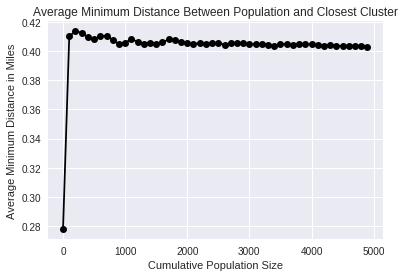

In [0]:
import geopy.distance as gp
import matplotlib.pyplot as plt
import random


# get 5000 random people
coords_list_2 = random.sample(big_coords_list, 5000)

x_cumpop = []
y_avgdist = []

print(x_sampled)

runningSum = 0


for i in range(len(x_sampled)):
  longPop = coords_list_2[i][1]
  latPop = coords_list_2[i][0]
  coordsPop = (latPop, longPop)
  minDistance = 1000
  
  for j in range(len(kmeans.cluster_centers_)):
    longCluster = kmeans.cluster_centers_[j][1]
    latCluster = kmeans.cluster_centers_[j][0]
    coordsCluster = (latCluster, longCluster)
    minDistance = min(minDistance, gp.distance(coordsCluster, coordsPop).miles)
      
  runningSum += minDistance
  
  if (i % 100 == 0):
    x_cumpop.append(i)
    y_avgdist.append(runningSum / (i+1))
    print(str(i) + "," + str(runningSum / (i + 1)))

MakeGraph(x_cumpop, y_avgdist)
plt.title('Average Minimum Distance Between Population and Closest Cluster')
plt.show()



### 3c. Computing Average Minimum Distance between People and 190 Unique Existing Stores

*Takes about ~4 minutes*

0,1.0631657787186473
100,0.45508593640980777
200,0.4613524159886579
300,0.4580393368244072
400,0.45560254132070893
500,0.4601495859776735
600,0.460416697344577
700,0.4576355750970591
800,0.4549817836209319
900,0.45545524731677023
1000,0.45505245207342293
1100,0.45369497842041334
1200,0.4546967423463422
1300,0.4529756099518391
1400,0.45214345952981977
1500,0.4514181357861308
1600,0.45223120573686615
1700,0.45181838849199346
1800,0.45137711495484006
1900,0.45353599913465076
2000,0.45333356877726055
2100,0.4550631322939641
2200,0.4530946659527847
2300,0.451321368579156
2400,0.45374545774637715
2500,0.4535777618336783
2600,0.45534643887989895
2700,0.45666977519295576
2800,0.4580557908770264
2900,0.4583462055225882
3000,0.4569952270562365
3100,0.4580031862217007
3200,0.45726328519773035
3300,0.4567964931938716
3400,0.45640102797341214
3500,0.45479056822855457
3600,0.4552097050375824
3700,0.4574991757081279
3800,0.45713380261441694
3900,0.45679055205037017
4000,0.4569180943147019
4100,0.4567

Text(0.5,1,'Average Minimum Distance Between Population and Closest Existing Store')

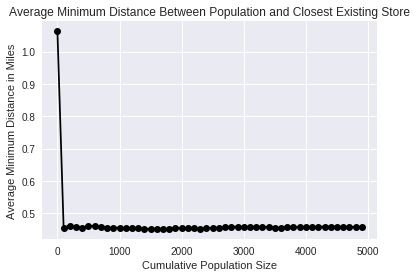

In [0]:
import geopy.distance as gp
import matplotlib.pyplot as plt
import random

# get 5000 random people
coords_list_2 = random.sample(big_coords_list, 5000)

x_cumpop = []
y_avgdist = []

runningSum = 0

uniqueStores = list(set(zip(store_list[0],store_list[1])))

for i in range(len(x_sampled)):
  longPop = coords_list_2[i][1]
  latPop = coords_list_2[i][0]
  coordsPop = (latPop, longPop)
  minDistance = 1000
  
  for j in range(len(uniqueStores)):
    longCluster = uniqueStores[j][1]
    latCluster = uniqueStores[j][0]
    coordsCluster = (latCluster, longCluster)
    minDistance = min(minDistance, gp.distance(coordsCluster, coordsPop).miles)

  runningSum += minDistance
  
  if (i % 100 == 0):
    x_cumpop.append(i)
    y_avgdist.append(runningSum / (i+1))
    print(str(i) + "," + str(runningSum / (i + 1)))

MakeGraph(x_cumpop, y_avgdist)
plt.title('Average Minimum Distance Between Population and Closest Existing Store')